In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import scipy.signal as sps
import heartpy as hp
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
from wuvars.data.photometry import load_wserv_v2, group_wserv_v2


In [3]:
from wuvars.analysis.detrending import poly_detrend, visualize_detrending
from wuvars.plotting.lightcurve import simple_phased_lc_scatter_gridspec
import wuvars.analysis.detrending
import importlib
importlib.reload(wuvars.analysis.detrending)

<module 'wuvars.analysis.detrending' from '/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/detrending.py'>

In [5]:
# pick out which ones need followup

spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ic = pd.read_excel(
    os.path.join(spreadsheet_dir, "IC_source_properties_periods_inspected.xlsx")
)

followup_ic = period_sheet_ic[(period_sheet_ic["Periodic?"] == "Yf") | (period_sheet_ic["Periodic?"] == "?f")]

len(followup_ic)

ic_date_offset = 56849
ic_start = 60
ic_end = 250

ic_dat = group_wserv_v2(load_wserv_v2(8))



Loading WSERV8 photometry data... DONE (elapsed time: 0.29s)


In [6]:
print(followup_ic)

     index        SOURCEID           shortname A/S/C     RA_deg     DE_deg  \
41      41  44989782468907     ic_041C_M4.8_Q2     C  56.031285  32.069112   
91      91  44989782442939     ic_091C_M5.0_Q2     C  56.113406  32.341336   
111    111  44989782440424     ic_111C_M4.5_Q2     C  56.132706  32.212260   
133    133  44989782466756     ic_133C_M4.8_Q2     C  56.154107  32.142840   
164    164  44989782455767  ic_164S_M4.8_Q1JHK     S  56.187341  32.226769   
166    166  44989782494816     ic_166C_M5.8_Q2     C  56.188421  32.182133   

         J_mag      H_mag      K_mag     Teff  ...  per_amp_H     per_fap_H  \
41   13.323595  12.644284  12.207322  3161.25  ...   0.016992  3.325386e-06   
91   13.685469  12.991987  12.496510  3125.00  ...   0.012451  5.369668e-08   
111  14.672596  13.406157  12.702225  3197.50  ...   0.022326  9.795821e-08   
133  12.973644  12.112554  11.614726  3161.25  ...   0.016383  8.235119e-10   
164  12.570226  11.796112  11.343050  3161.25  ...   0.011

In [7]:
followup_sourceids = followup_ic['SOURCEID']
followup_status = followup_ic['Periodic?']
print(followup_sourceids)

41     44989782468907
91     44989782442939
111    44989782440424
133    44989782466756
164    44989782455767
166    44989782494816
Name: SOURCEID, dtype: int64


In [8]:
for sid, status in zip(followup_sourceids, followup_status):
    print(sid, status)

44989782468907 Yf
44989782442939 Yf
44989782440424 Yf
44989782466756 Yf
44989782455767 ?f
44989782494816 ?f


44989782494816
J period: 0.6453
J amp: 0.009
H period: 0.6454
H amp: 0.011
K period: 0.3924
K amp: 0.008


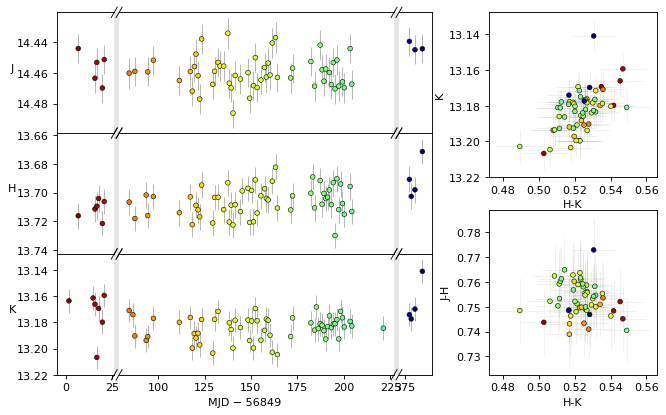

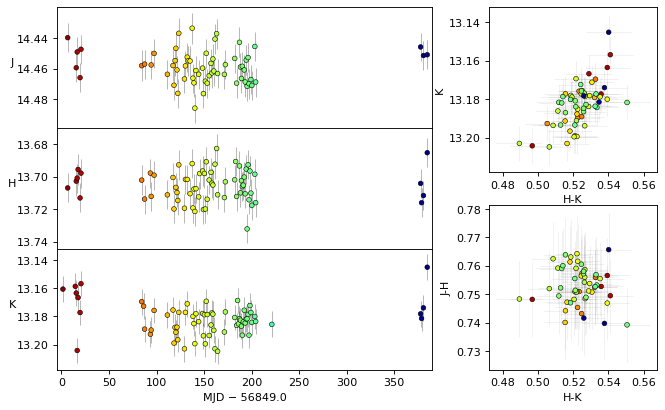

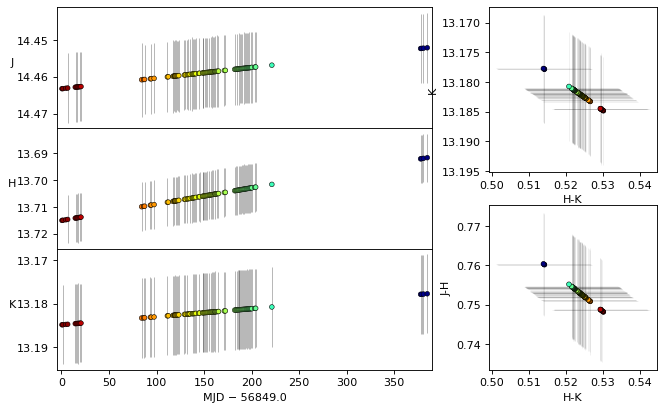

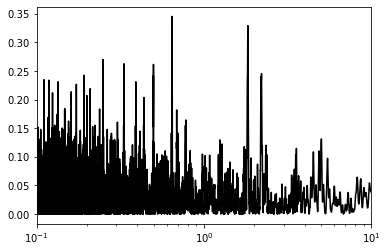

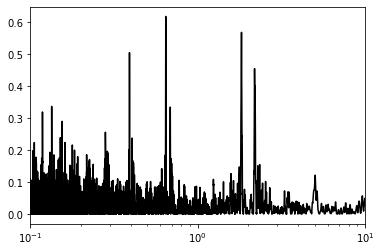

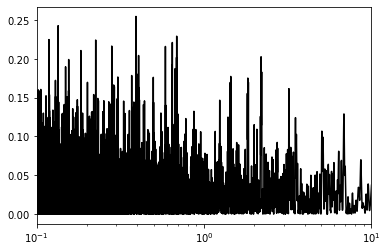

In [9]:
print(sid)
visualize_detrending(sid, ic_dat, ic_date_offset)

41 44989782468907

J period: 2.3353
J amp: 0.013
H period: 2.3381
H amp: 0.018
K period: 2.3348
K amp: 0.013
periods agree:  [2.335347579012922, 2.3380777024394046, 2.334802319246634]


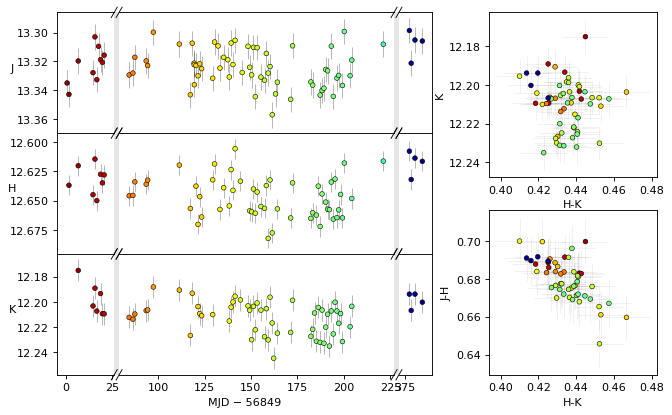

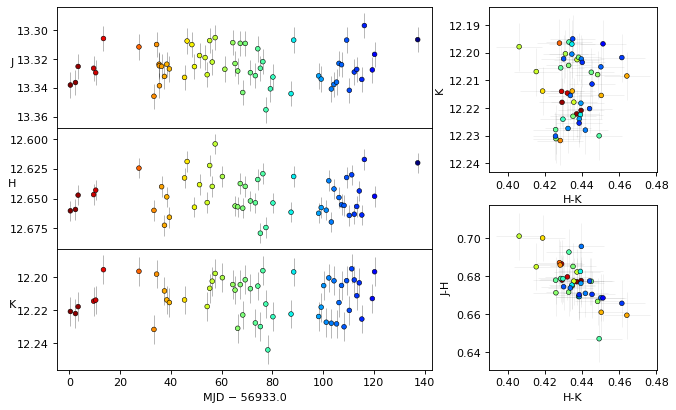

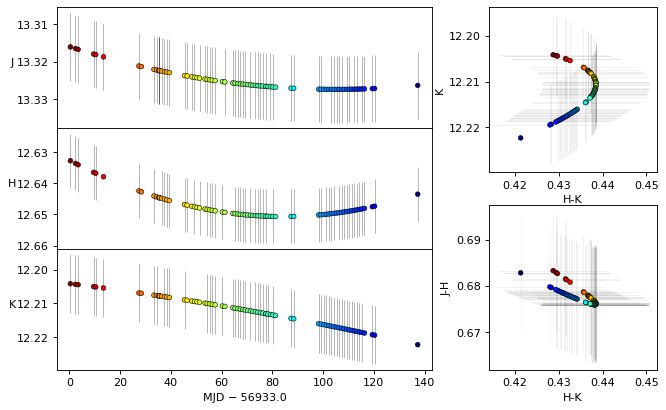

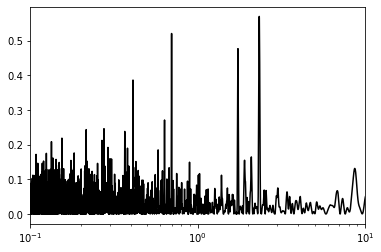

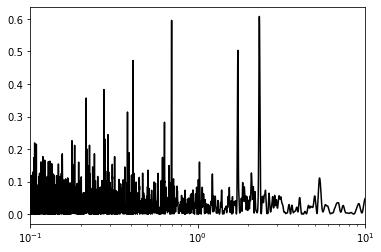

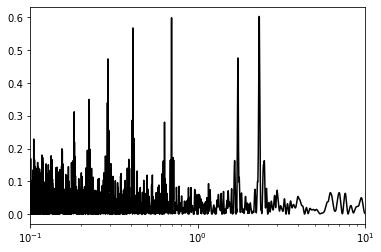

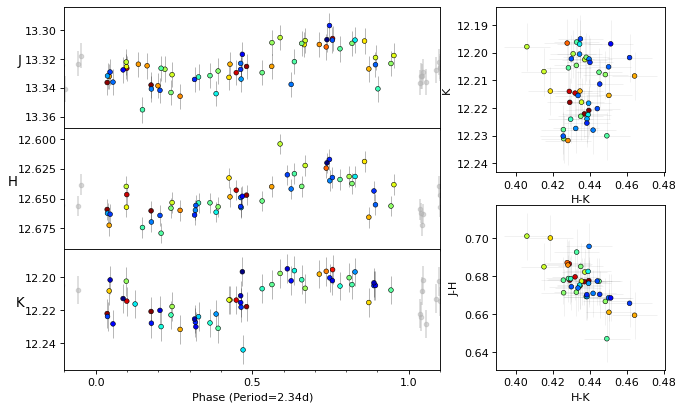





****************************************************************************
91 44989782442939

J period: 2.4384
J amp: 0.009
H period: 0.4141
H amp: 0.012
K period: 2.4384
K amp: 0.010
periods agree:  [2.438419491181013, 0.4141283941414392, 2.438419491181013]


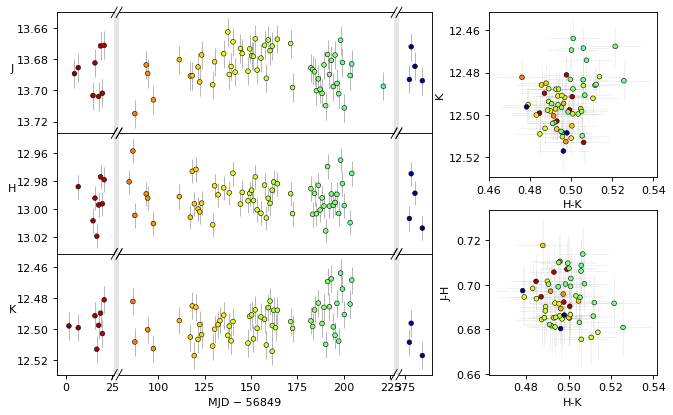

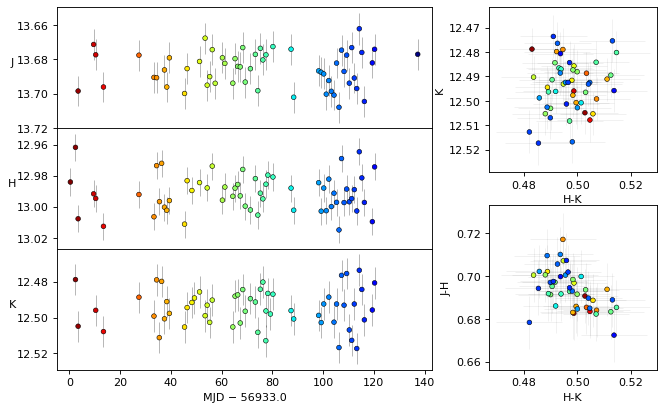

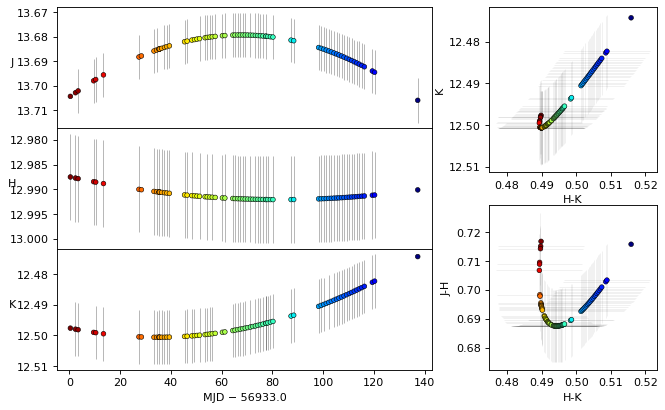

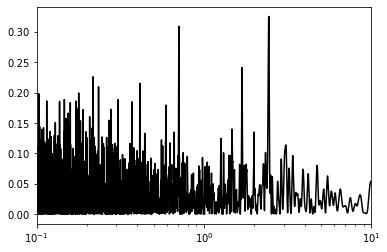

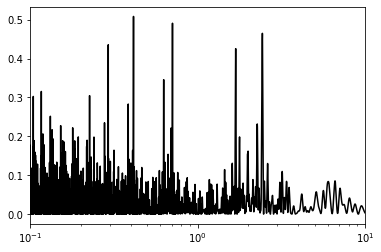

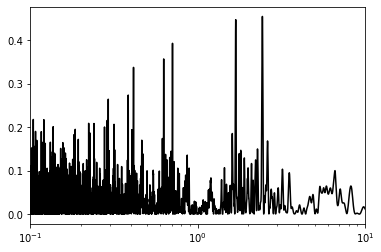

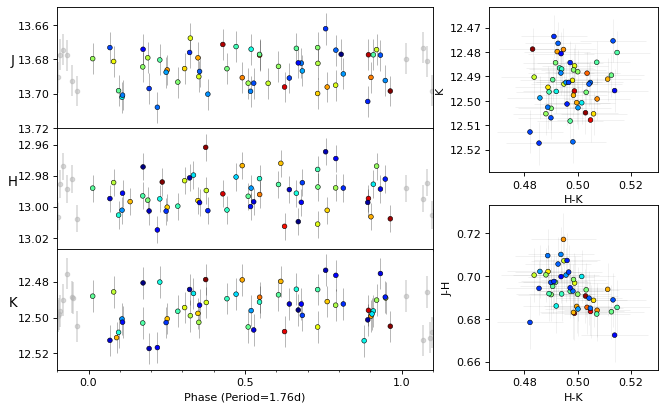





****************************************************************************
111 44989782440424

J period: 3.0969
J amp: 0.021
H period: 3.0874
H amp: 0.025
K period: 3.0836
K amp: 0.019
periods agree:  [3.096921131413234, 3.0873597818256666, 3.0835517524925478]


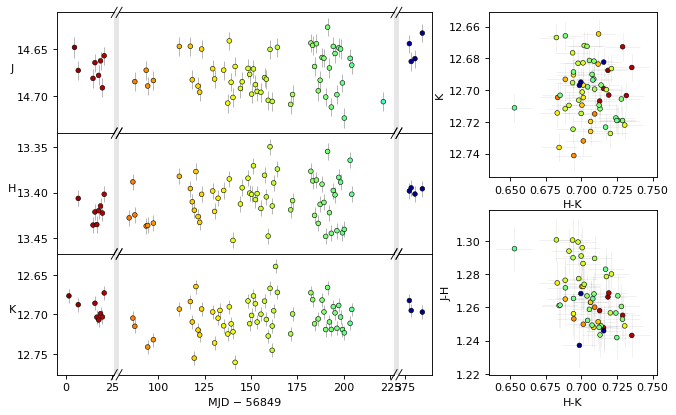

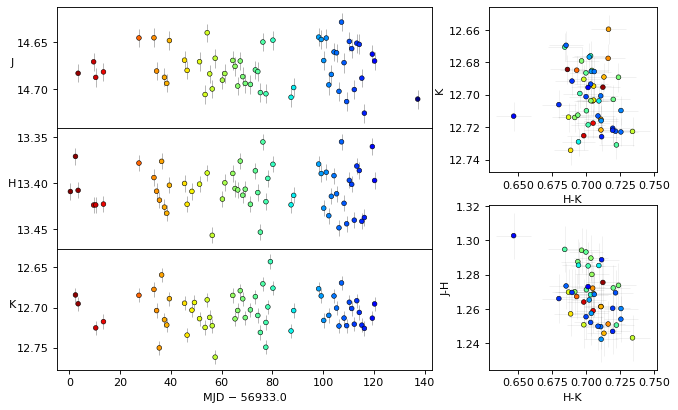

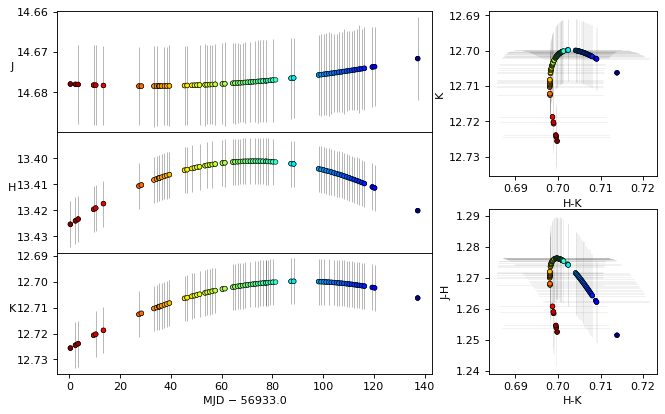

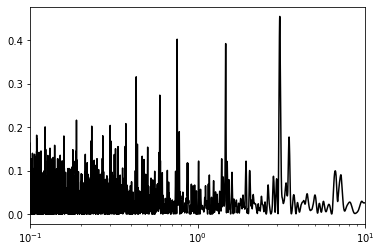

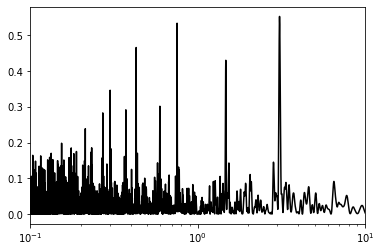

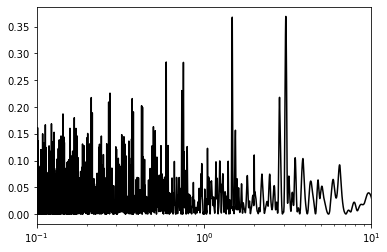

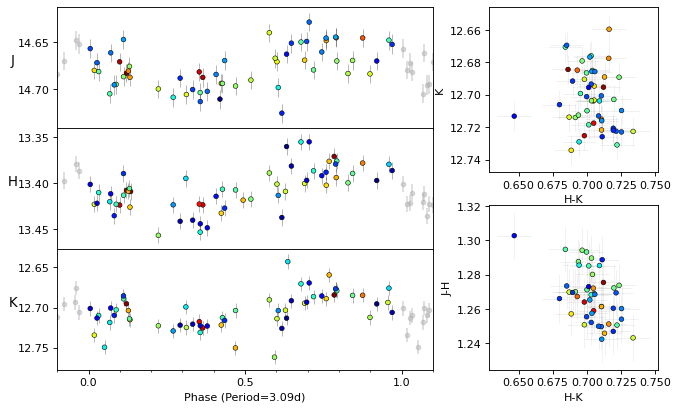





****************************************************************************
133 44989782466756

J period: 2.4606
J amp: 0.012
H period: 2.4576
H amp: 0.015
K period: 2.4576
K amp: 0.014
periods agree:  [2.4606196686351702, 2.4575960514458917, 2.4575960514458917]


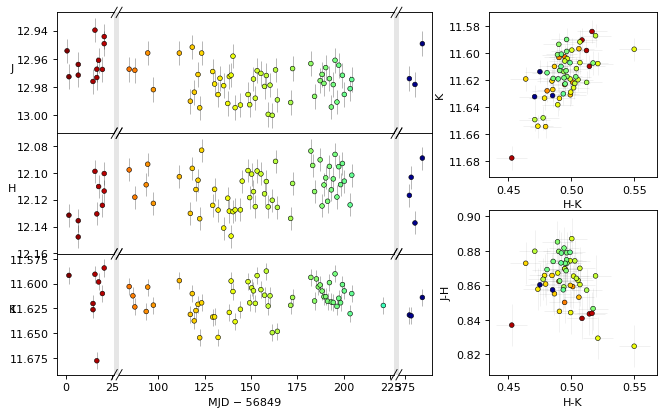

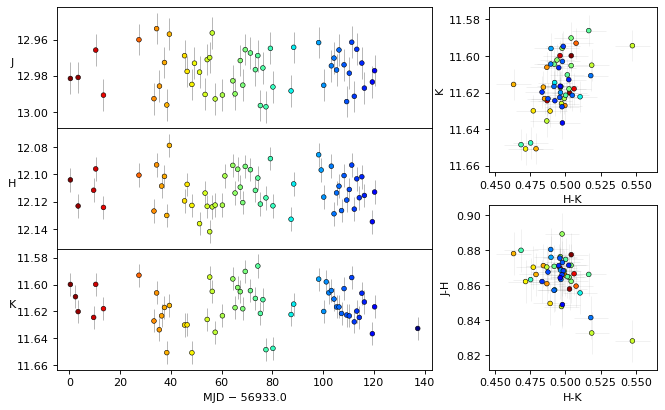

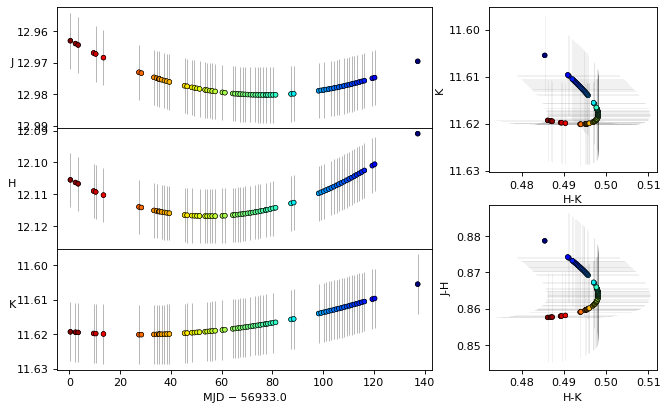

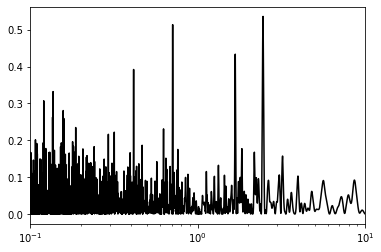

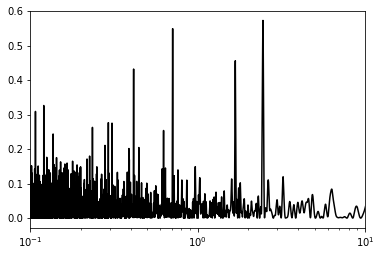

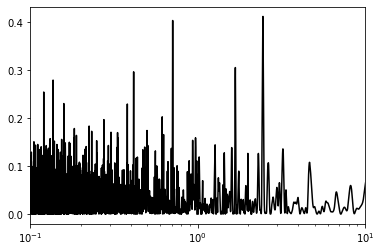

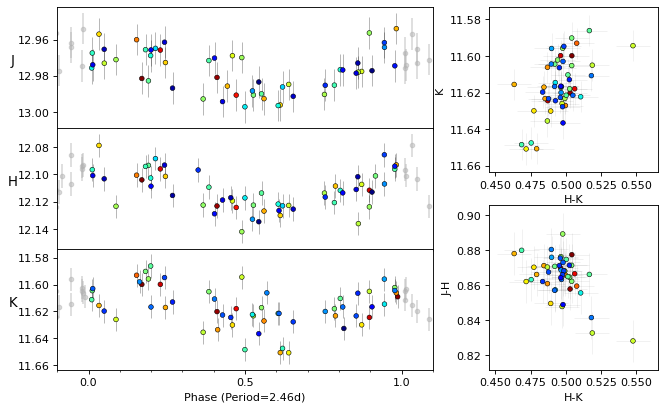





****************************************************************************
164 44989782455767

J period: 1.0456
J amp: 0.013
H period: 21.9779
H amp: 0.013
K period: 0.3308
K amp: 0.012
periods disagree:  [1.045583263627492, 21.977930402930404, 0.3307958429815856] ; using K


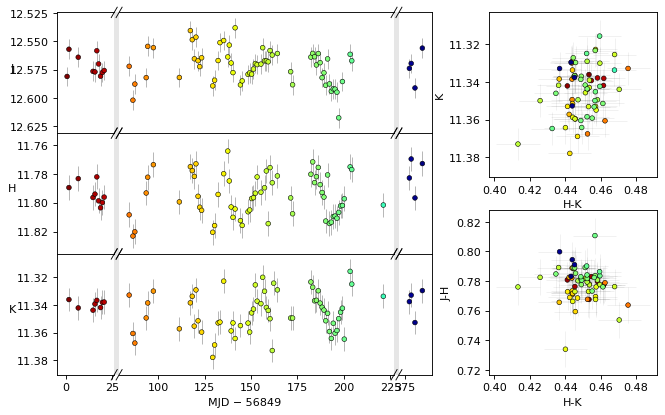

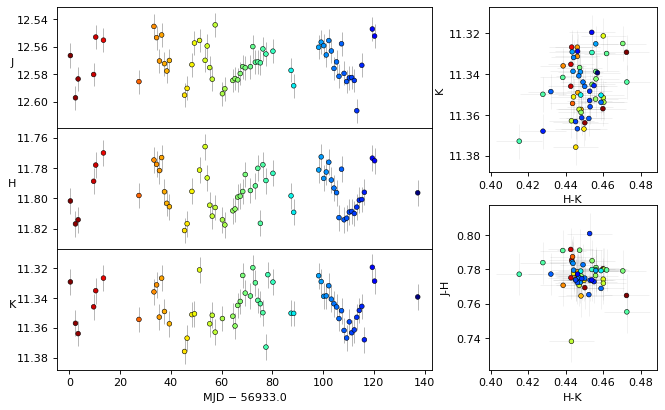

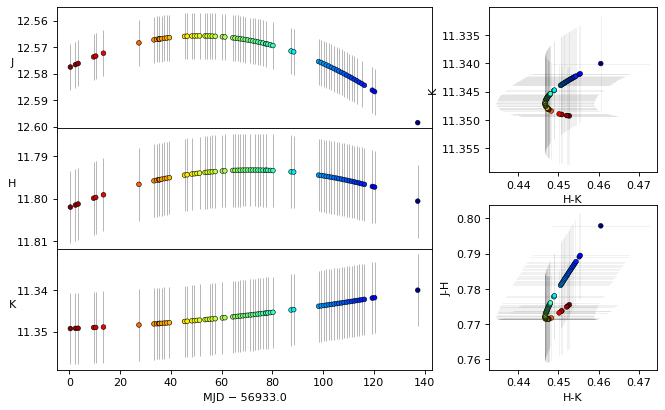

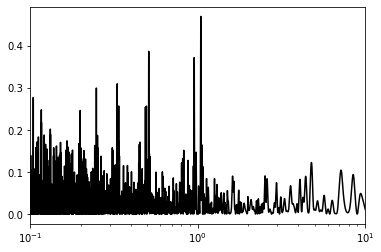

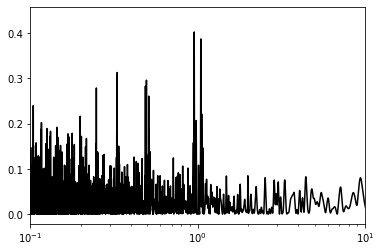

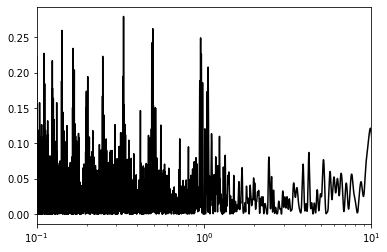

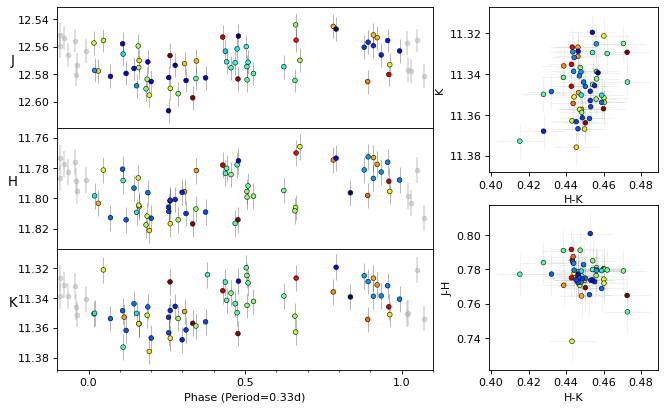





****************************************************************************
166 44989782494816

J period: 1.8245
J amp: 0.008
H period: 0.6456
H amp: 0.011
K period: 0.3921
K amp: 0.008
periods disagree:  [1.8244769810861765, 0.6455751022164837, 0.39210909827601975] ; using K


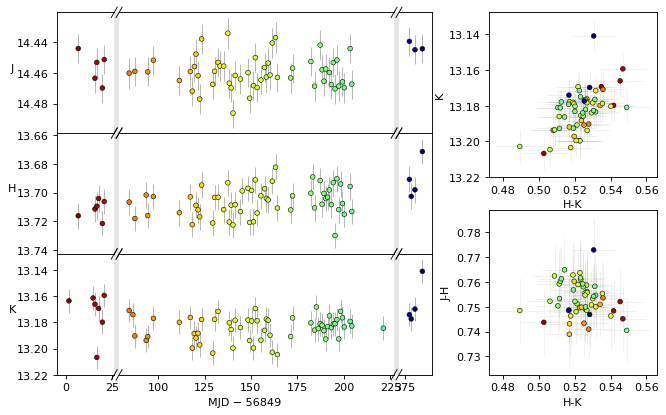

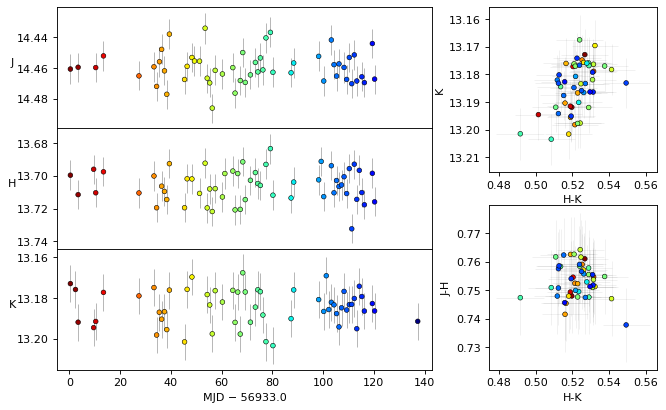

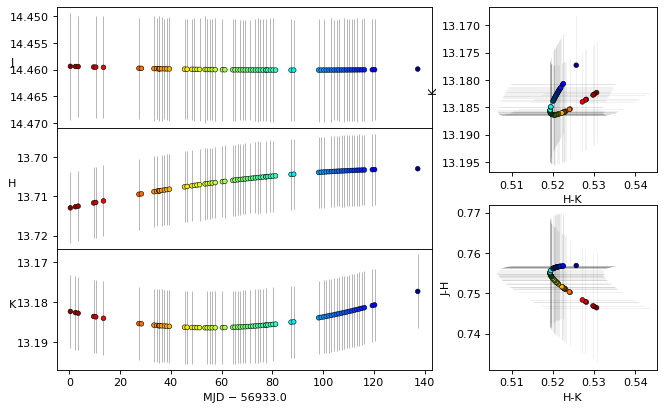

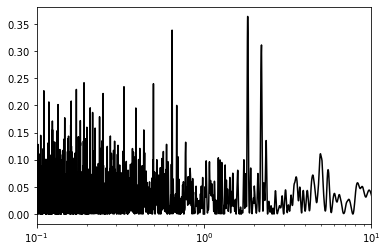

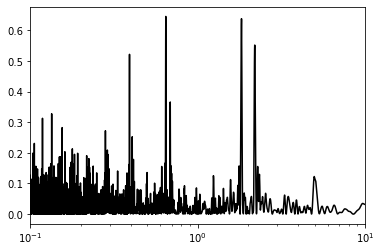

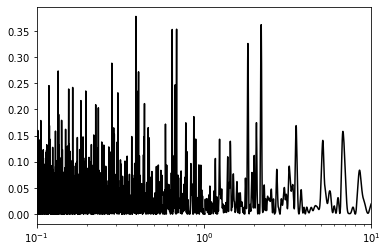

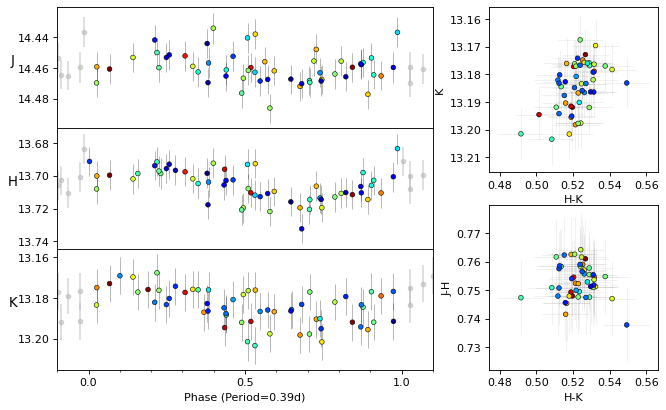





****************************************************************************


In [12]:
for index, row in followup_ic.iterrows():
    print(row['index'], row['SOURCEID'])
    print('')
    visualize_detrending(row['SOURCEID'], ic_dat, ic_date_offset, start=ic_start, end=ic_end, plot_phase=True, poly_order=2)
    plt.show()
    
    print('\n\n\n')
    print('*'*76)

In [11]:
type(followup_ngc)

pandas.core.frame.DataFrame

J period: 0.08
H period: 13.68
K period: 3.55


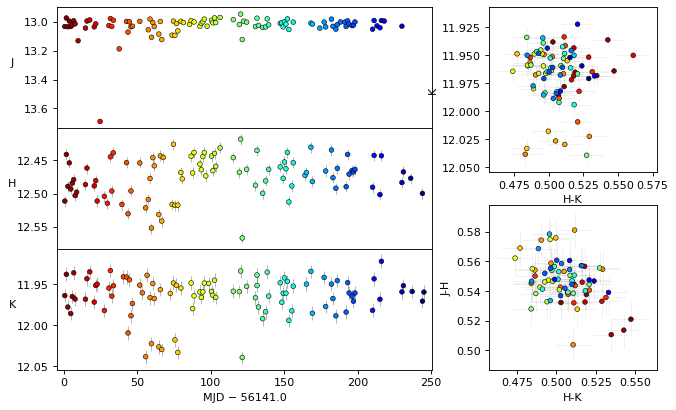

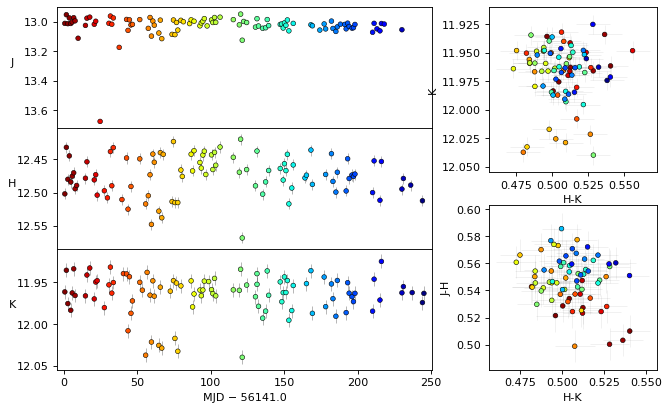

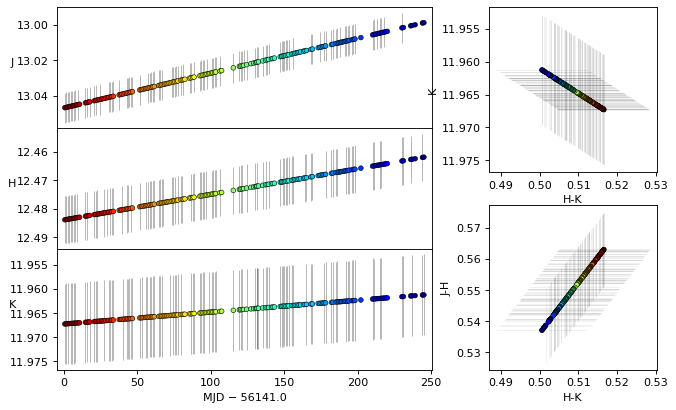

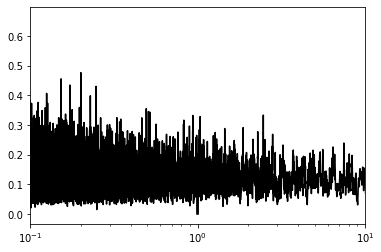

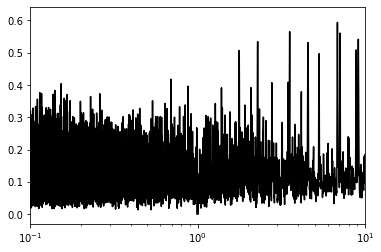

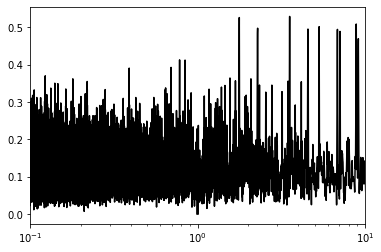

In [34]:
visualize_detrending(followup_ngc.loc[19,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=6)


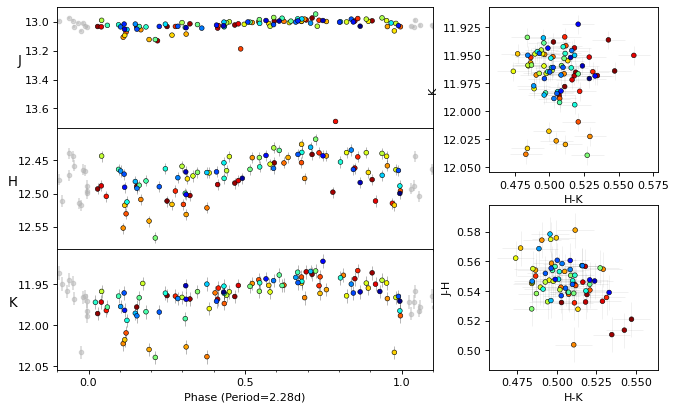

In [39]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[19,'SOURCEID'], 2.28257437419158, cmap='jet_r'
)


J period: 4.13
H period: 8.26
K period: 8.27


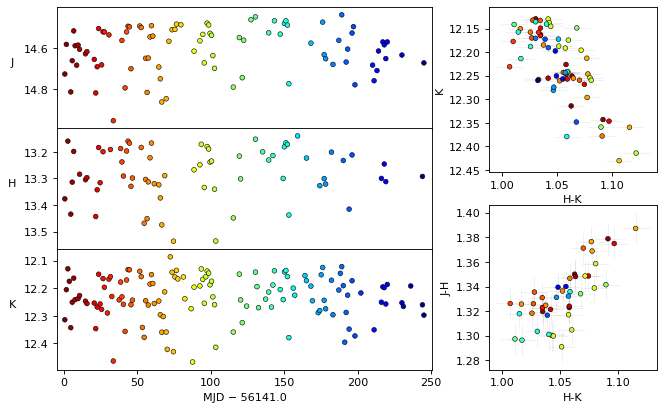

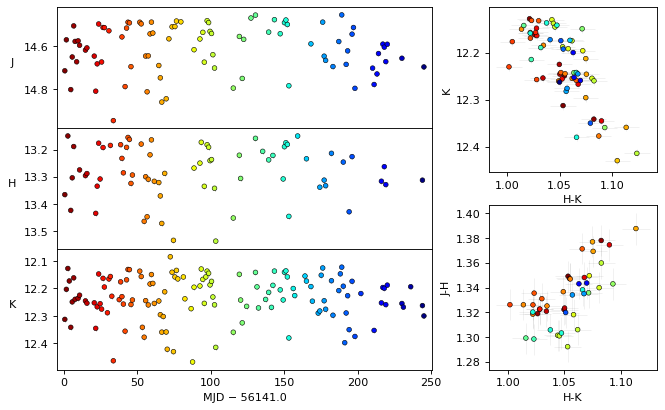

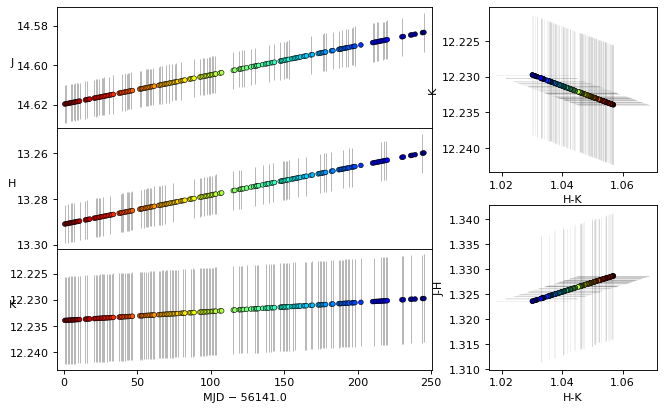

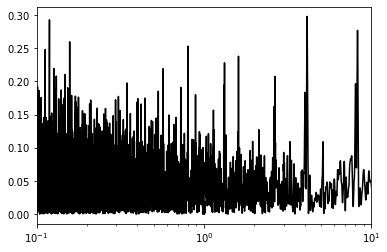

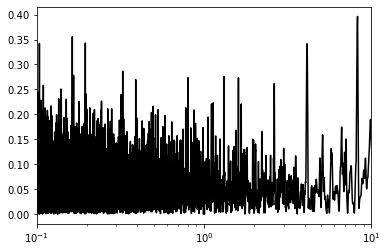

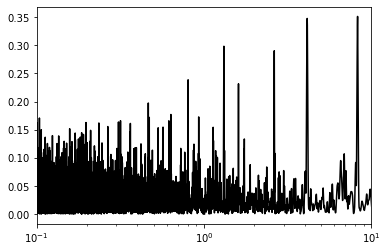

In [40]:
visualize_detrending(followup_ngc.loc[34,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=2)


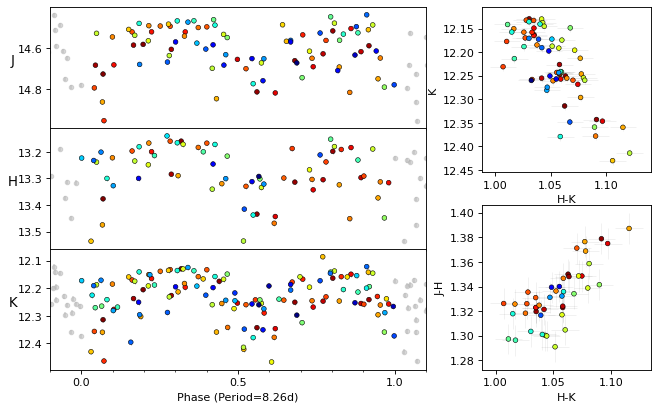

In [41]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[34,'SOURCEID'], 8.26, cmap='jet_r'
)


J period: 26.1096
H period: 0.3323
K period: 26.4549


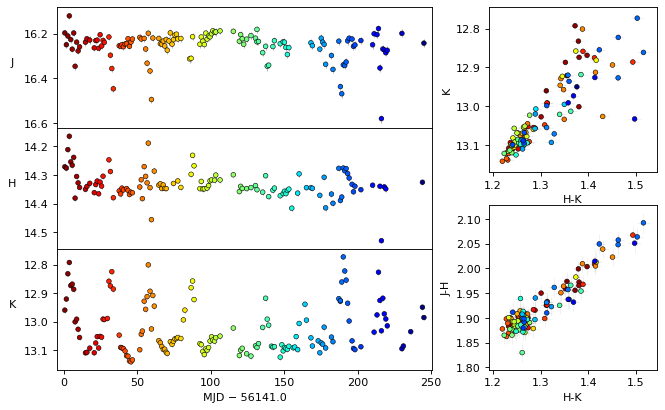

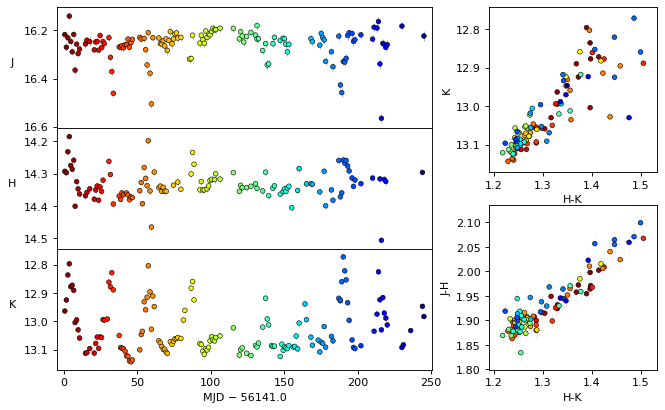

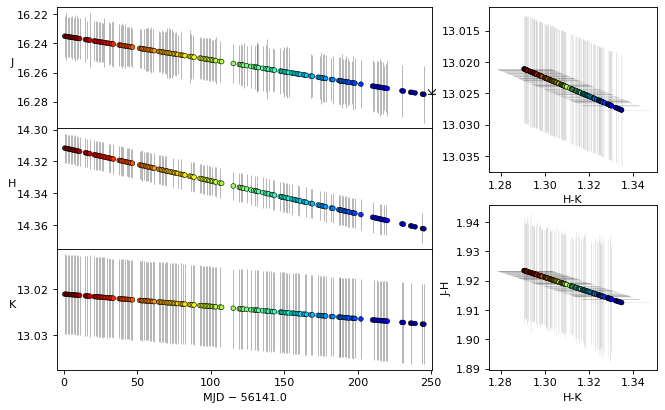

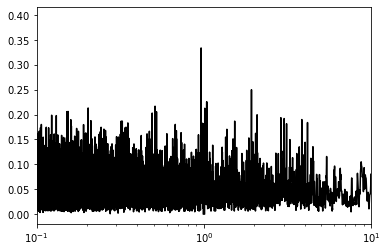

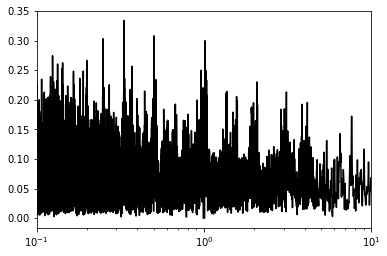

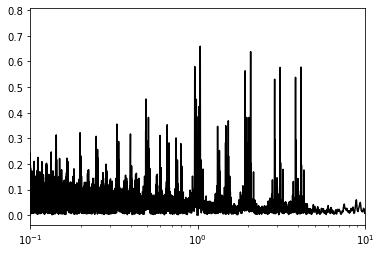

In [44]:
visualize_detrending(followup_ngc.loc[60,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=4)


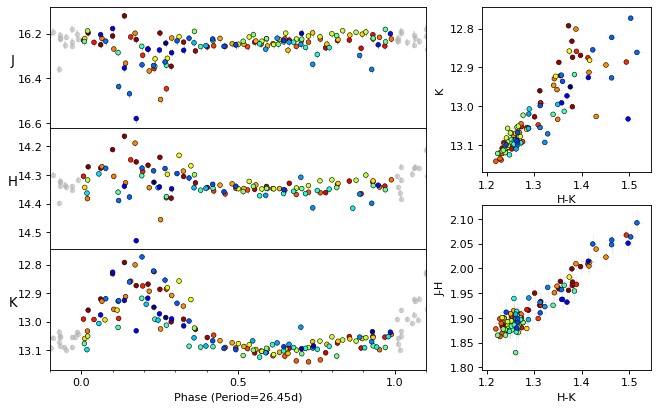

In [45]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[60,'SOURCEID'], 26.4549, cmap='jet_r'
)


J period: 2.2272
J amp: 0.010
H period: 2.2287
H amp: 0.014
K period: 2.2272
K amp: 0.012


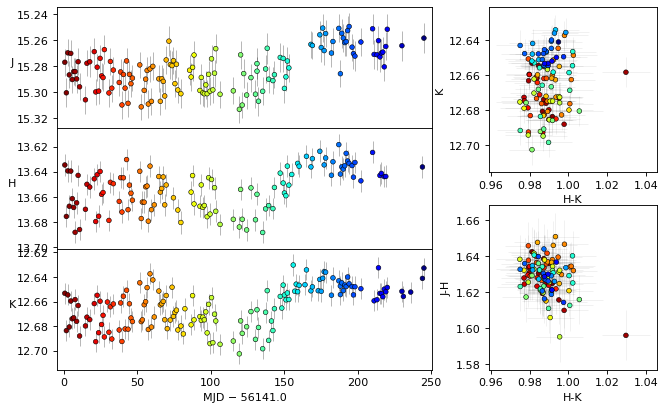

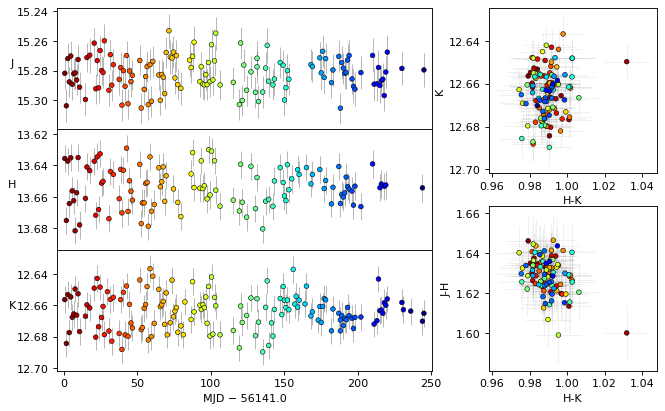

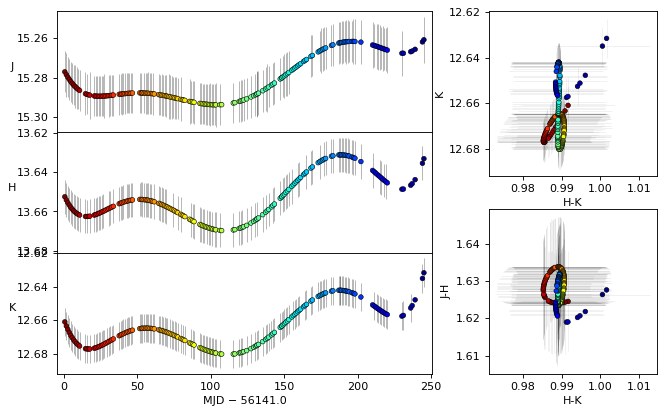

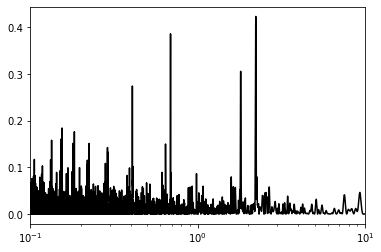

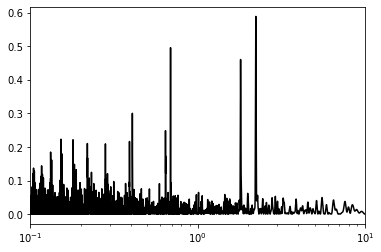

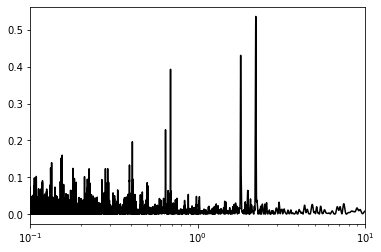

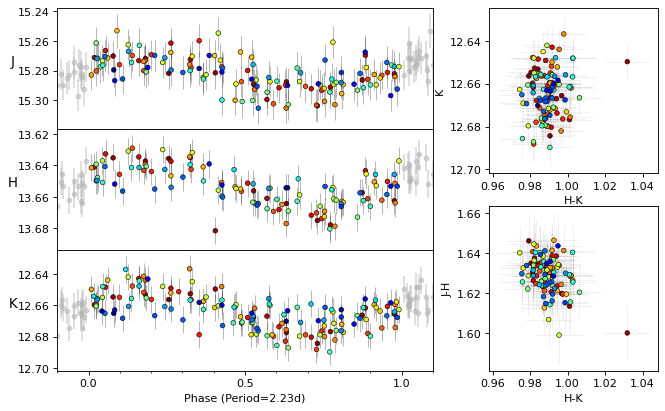

In [60]:
visualize_detrending(followup_ngc.loc[68,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=6, plot_phase=True)


J period: 2.4444
J amp: 0.015
H period: 2.4426
H amp: 0.016
K period: 2.4438
K amp: 0.012


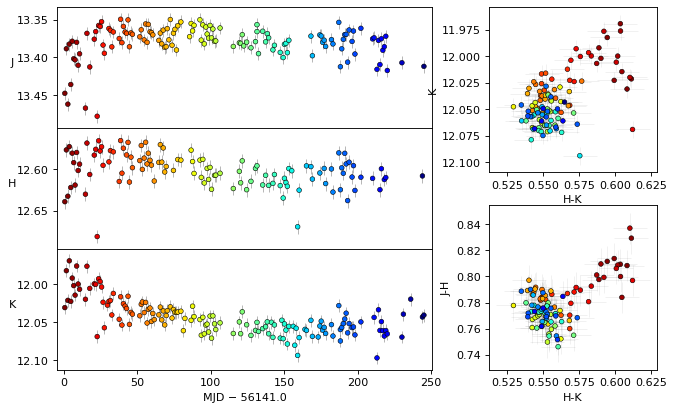

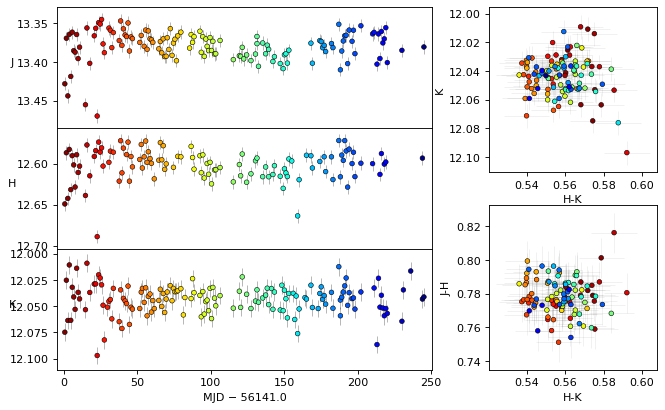

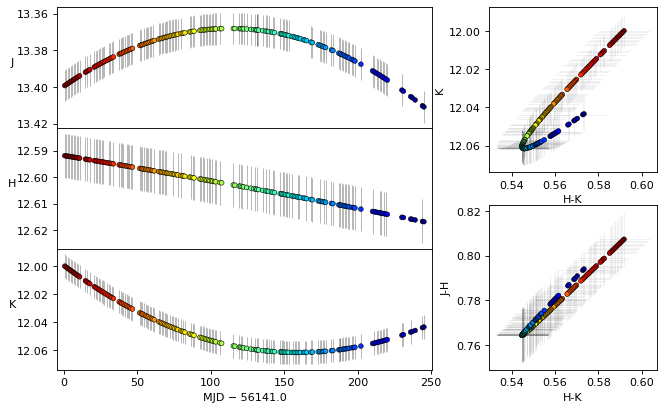

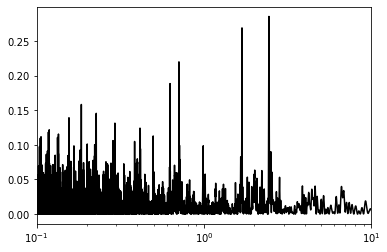

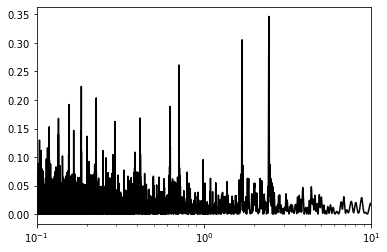

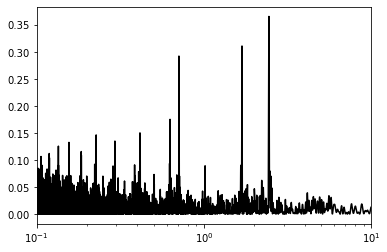

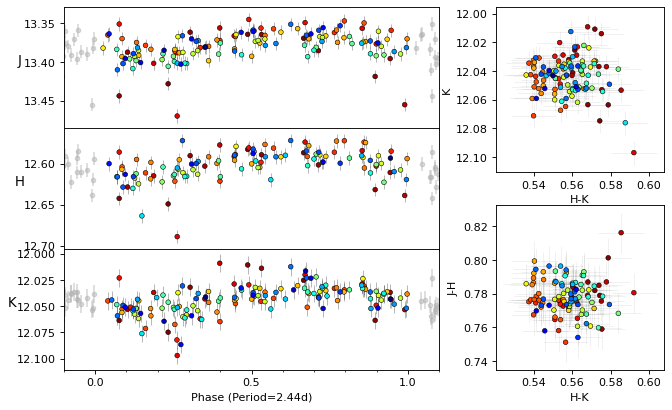

In [62]:
visualize_detrending(followup_ngc.loc[72,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True)


J period: 5.2826
J amp: 0.051
H period: 5.2826
H amp: 0.047
K period: 5.2826
K amp: 0.032


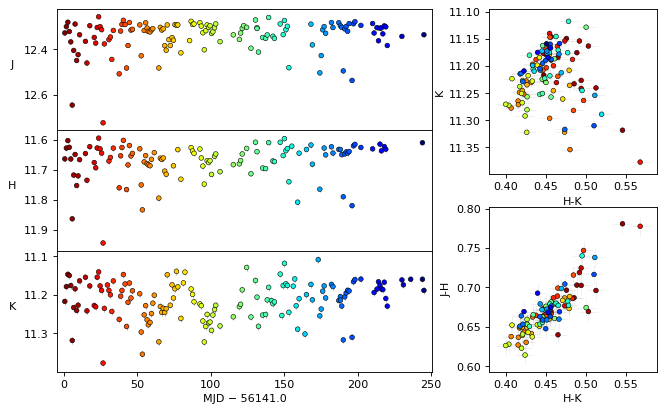

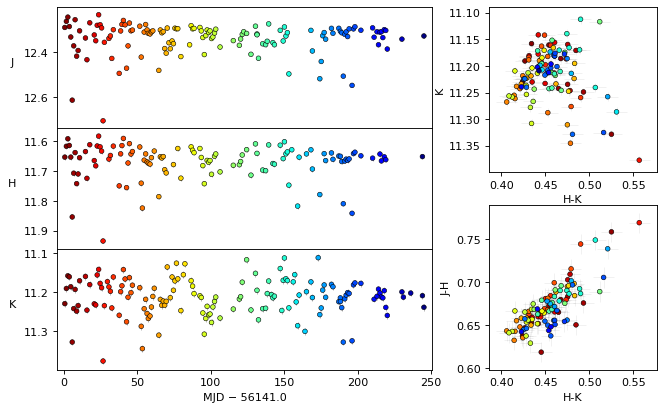

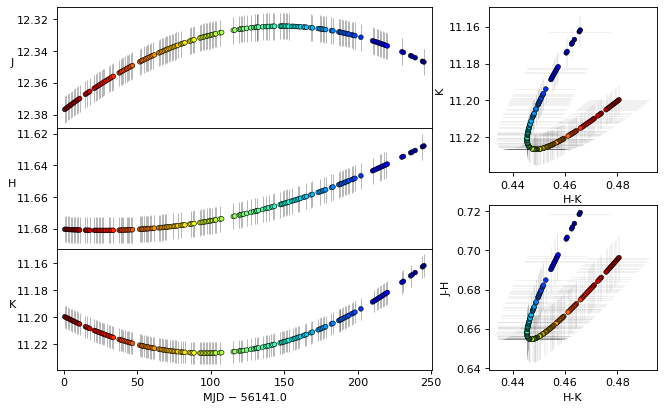

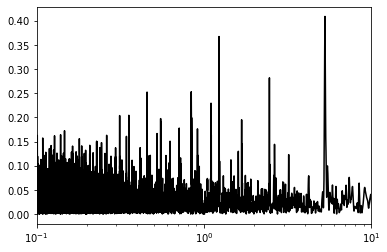

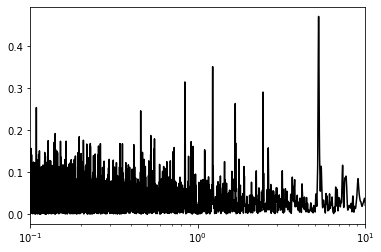

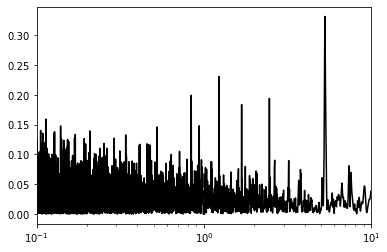

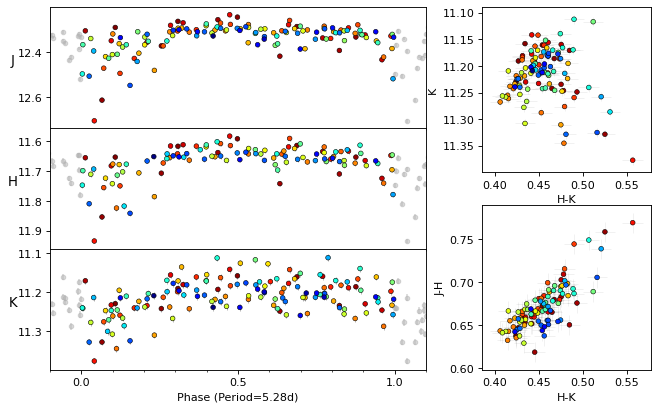

In [63]:
visualize_detrending(followup_ngc.loc[82,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True, nterms=2)


J period: 3.6576
J amp: 0.089
H period: 3.6616
H amp: 0.099
K period: 3.6563
K amp: 0.070


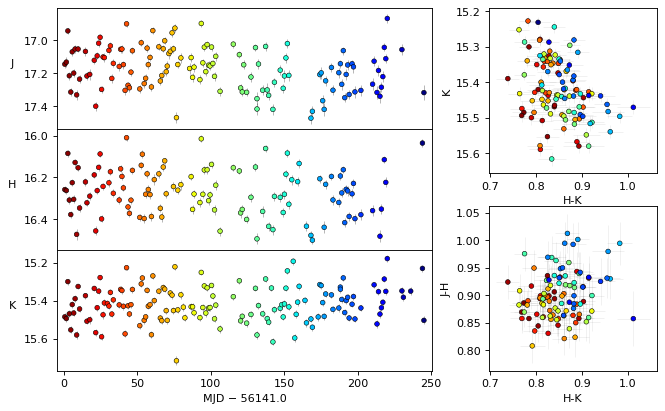

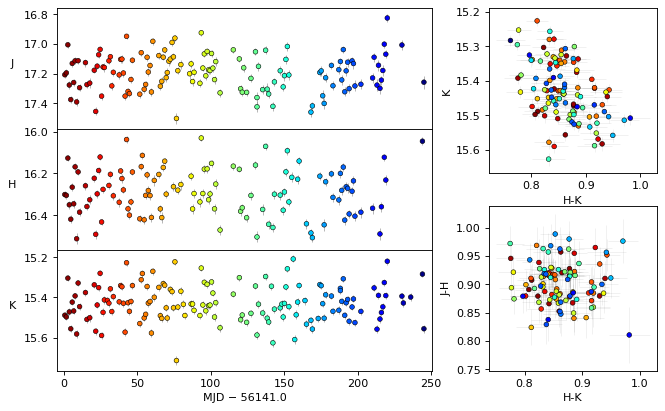

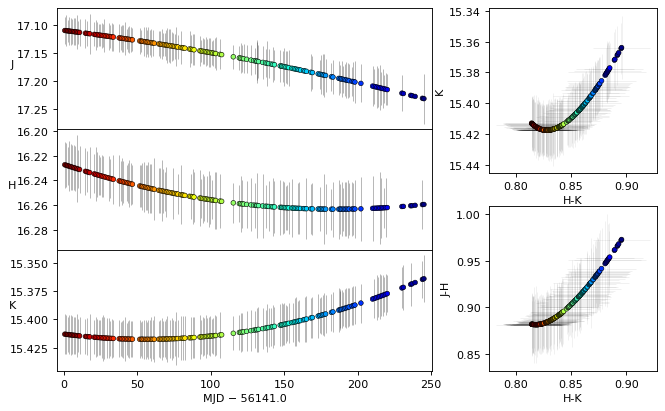

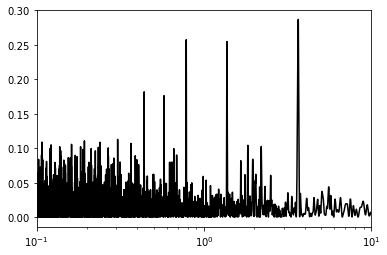

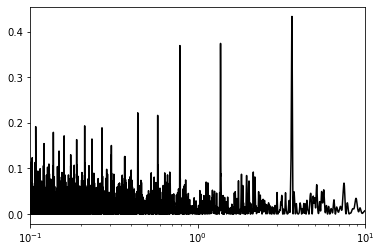

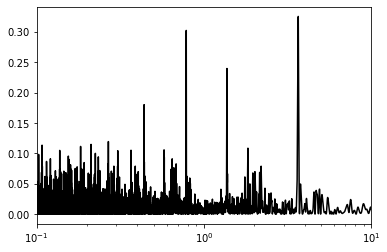

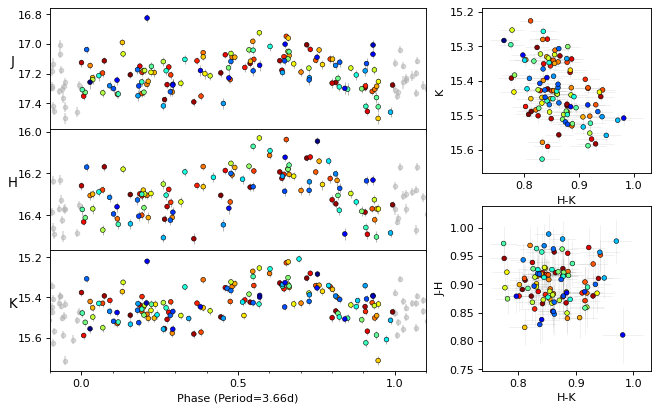

In [64]:
visualize_detrending(followup_ngc.loc[92,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True,)
